---
# Current Chapter ...
[Local](./probCh02.ipynb)
[Github](https://github.com/renyuanL/_ryProb2020/blob/master/probCh02.ipynb)
[Colab](https://colab.research.google.com/github/renyuanL/_ryProb2020/blob/master/probCh02.ipynb)


## 2. Random Variables, Distributions, and Expectations

   - 2.1 Concept of a Random Variable
   - 2.2 Discrete Probability Distributions
   - 2.3 Continuous Probability Distributions
       -             Exercises
   - 2.4 Joint Probability Distributions
       -             Exercises
   - 2.5 Mean of a Random Variable
       -             Exercises
   - 2.6 Variance and Covariance of Random Variables.
       -             Exercises
   - 2.7 Means and Variances of Linear Combinations of Random Variables
       -             Exercises
   -     Review Exercises
   - 2.8 Potential Misconceptions and Hazards; Relationship to Material in Other Chapters
   

## Ref: a on-line course

https://www.khanacademy.org/math/statistics-probability

https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library

![]()

![image.png](fg/fg_KhanAcademy.PNG)


----

# Ch02

----

![](media/Ch02/image6.png) <div style="text-align: right">【p02.000】</div>

## Def 2.1: Random Variable

![image.png](fg/ch02/def2.01.png)

![](media/Ch02/image7.png) <div style="text-align: right">【p02.001】</div>

## Ex 2.1

Two balls are drawn in succession without replacement from an urn containing 4 red balls and 3 black balls. The possible outcomes and the values y of the random variable Y , where Y is the number of red balls, are ....


![](media/Ch02/image8.png) <div style="text-align: right">【p02.002】</div>
![](media/Ch02/image9.png) <div style="text-align: right">【p02.003】</div>

## Ex 2.2

A stockroom clerk returns three safety helmets at random to three steel mill employees who had previously checked them. If Smith, Jones, and Brown, in that order, receive one of the three hats, list the sample points for the possible orders of returning the helmets, and find the value m of the random variable M that represents the number of correct matches.


![](media/Ch02/image10.png) <div style="text-align: right">【p02.004】</div>

## Def2.2: Discrete Sample Space
![image.png](fg/ch02/def2.02.png)

![](media/Ch02/image11.png) <div style="text-align: right">【p02.005】</div>

`【Example 3.3】`: 

Consider the simple condition in which components are arriving from the production
line and they are stipulated to be defective or not defective. 

Define the random variable $X$ by

$
X = \begin{cases}
1, \text{ if the component is defective},\\
0, \text{ if the component is not defective}.
\end{cases}
$

Clearly the assignment of 1 or 0 is arbitrary though quite convenient. 
This will become clear in later chapters. 
The random variable for which 0 and 1 are chosen to describe the two possible values is called a `Bernoulli random variable`.

![](media/Ch02/image12.png) <div style="text-align: right">【p02.006】</div>

[Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial)

- a Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes, 
- "success" and "failure", 
- in which the probability of success is the same every time the experiment is conducted.

[Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli)

- In 1683, Jacob Bernoulli discovered the constant e 
- by studying a question about compound interest 
- which required him to find the value of the following expression 
- (which is in fact e):

---

$
exp(1)=e^{1}=\\
\lim _{n\to \infty }\left(1+{\frac {1}{n}}\right)^{n}
$

---

$
exp(x)=e^{x}=\\
\lim _{n\to \infty }\left(1+{\frac {x}{n}}\right)^{n}
$

In [1]:
import numpy as np

def f(x,n):
    y= (1+x/n)**n
    return y

n= np.array([1,10,100,1000,10000, 1e5, 1e10])

n, f(1,n)

(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+10]),
 array([2.        , 2.59374246, 2.70481383, 2.71692393, 2.71814593,
        2.71826824, 2.71828205]))

In [2]:
import numpy as np

x= np.arange(10)
x, np.exp(x), f(x, n=1e10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
        5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
        2.98095799e+03, 8.10308393e+03]),
 array([1.00000000e+00, 2.71828205e+00, 7.38905732e+00, 2.00855419e+01,
        5.45981681e+01, 1.48413220e+02, 4.03428993e+02, 1.09663379e+03,
        2.98095995e+03, 8.10308993e+03]))

## Example 2.4: 

Statisticians use sampling plans 
to either accept or reject batches or lots of material. 

Suppose one of these sampling plans 
involves sampling independently 10 items 
from a lot of 100 items in which 12 are defective. 

Let X be the random variable 
defined as the number of items found defective 
in the sample of 10. 

In this case, the random variable X takes on the values 0, 1, 2, . . . , 9, 10.


![](media/Ch02/image13.png) <div style="text-align: right">【p02.007】</div>

[rySol]:

[](fg/fg_ex3.4.png)

In [3]:
import numpy as np
import scipy.special as sp

f= sp.factorial

N= 100
K= 12

p= K/N # == .12
q= 1-p

n= 10

x= np.arange(0,n+1)

# (1) Binomial 近似，但公式簡單
f1= p**x * q**(n-x) * (f(n)/f(x)/f(n-x))

# (2) HyperGeometric 理論精準，但公式繁雜
f2=  (f(K)/f(x)/f(K-x))          \
   * (f(N-K)/f(n-x)/f(N-K-n+x))  \
   / (f(N)/f(n)/f(N-n))

x, f1, f1.sum(), \
x, f2, f2.sum()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([2.78500976e-01, 3.79774058e-01, 2.33043172e-01, 8.47429717e-02,
        2.02227546e-02, 3.30917803e-03, 3.76042957e-04, 2.93020486e-05,
        1.49840021e-06, 4.54060671e-08, 6.19173642e-10]),
 1.0,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([2.60750269e-01, 3.96076358e-01, 2.45072246e-01, 8.06822210e-02,
        1.54968900e-02, 1.79241138e-03, 1.24473012e-04, 5.02076016e-06,
        1.09464248e-07, 1.11840866e-09, 3.81275679e-12]),
 1.0)

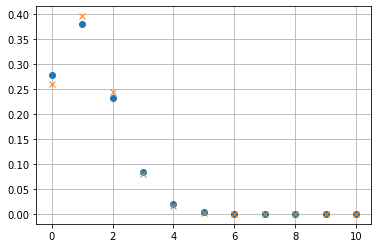

In [4]:
import matplotlib.pyplot as pl
pl.plot(x,f1,'o', x,f2, 'x'); pl.grid()


## Example 2.5: 

Suppose a sampling plan involves sampling items from a process until a defective is observed. 

The evaluation of the process will depend on how many consecutive items are observed. 

In that regard, 
let X be a random variable 
defined by the number of items 
observed before a defective is found. 

With N a nondefective and D a defective, 
sample spaces are S = {D} given X = 1, 
S = {ND} given X = 2, 
S = {NND} given X = 3, 
and so on.

![](media/Ch02/image14.png) <div style="text-align: right">【p02.008】</div>

[](media/Ch02/image15.png) <div style="text-align: right">【p02.009】</div>

[](media/Ch02/image16.png) <div style="text-align: right">【p02.010】</div>

## Def2.3: Continuous Sample Space

![image.png](fg/ch02/def2.03.png)

![](media/Ch02/image17.png) <div style="text-align: right">【p02.011】</div>


## Def2.4: Probability Mass Function

![image.png](fg/ch02/def2.04.png)
![](media/Ch02/image18.png) <div style="text-align: right">【p02.012】</div>

![](media/Ch02/image19.png) <div style="text-align: right">【p02.013】</div>
![](media/Ch02/image20.png) <div style="text-align: right">【p02.014】</div>
![](media/Ch02/image21.png) <div style="text-align: right">【p02.015】</div>

## Def2.5: Cumulative Distribution Function

![image.png](fg/ch02/def2.05.png)
![](media/Ch02/image22.png) <div style="text-align: right">【p02.016】</div>


![](media/Ch02/image23.png) <div style="text-align: right">【p02.017】</div>
![](media/Ch02/image24.png) <div style="text-align: right">【p02.018】</div>
![](media/Ch02/image25.png) <div style="text-align: right">【p02.019】</div>

![](media/Ch02/image26.png) <div style="text-align: right">【p02.020】</div>
![](media/Ch02/image27.png) <div style="text-align: right">【p02.021】</div>
![](media/Ch02/image28.png) <div style="text-align: right">【p02.022】</div>

## Def2.6: Probability Density Function

![image.png](fg/ch02/def2.06.png)
![](media/Ch02/image33.png) <div style="text-align: right">【p02.025】</div>

![](media/Ch02/image30.png) <div style="text-align: right">【p02.023】</div>
![](media/Ch02/image32.png) <div style="text-align: right">【p02.024】</div>

## Ex 2.11
Suppose that the error in the reaction temperature, in ◦C, for a controlled laboratory experiment is a continuous random variable X having the probability density function


(a) Verify that f(x) is a density function.

(b) Find P(0 < X ≤ 1).

![](media/Ch02/image34.png) <div style="text-align: right">【p02.026】</div>
![](media/Ch02/image35.png) <div style="text-align: right">【p02.027】</div>

## Def2.7 Cumulative Distribution Function

![image.png](fg/ch02/def2.07.png)
![](media/Ch02/image38.png) <div style="text-align: right">【p02.028】</div>

![](media/Ch02/image39.png) <div style="text-align: right">【p02.029】</div>

![](media/Ch02/image40.png) <div style="text-align: right">【p02.030】</div>
![](media/Ch02/image41.png) <div style="text-align: right">【p02.031】</div>
![](media/Ch02/image42.png) <div style="text-align: right">【p02.032】</div>

## Def2.8: Joint Probability Mass Function

![image.png](fg/ch02/def2.08.png)
![](media/Ch02/image46.png) <div style="text-align: right">【p02.033】</div>

## Example b3.14: 

Two ballpoint pens are selected at random from a box that contains 

- 3 blue pens,
- 2 red pens, 
- 3 green pens. 

If X is the number of blue pens selected 
and Y is the number of red pens selected, 

find
- (a) the joint probability function f(x, y),
- (b) P[(X, Y ) ∈ A], where A is the region {(x, y)|x + y ≤ 1}.

![](media/Ch02/image47.png) <div style="text-align: right">【p02.034】</div>
![](media/Ch02/image48.png) <div style="text-align: right">【p02.035】</div>
![](media/Ch02/image49.png) <div style="text-align: right">【p02.036】</div>

## Def2.9: Joint Probability Density Function

![image.png](fg/ch02/def2.09.png)
![](media/Ch02/image51.png) <div style="text-align: right">【p02.037】</div>

Example b3.15: 

A privately owned business operates both a drive-in facility and a walk-in facility.

On a randomly selected day, let X and Y , respectively, be the proportions of the time that the drive-in and the walk-in facilities are in use, and suppose that the joint density function of these random variables is

$
f(x, y) =
\begin{cases}
\frac{2}{5}(2x + 3y), & 0 ≤ x ≤ 1, & 0 ≤ y ≤ 1,\\
0, & elsewhere.
\end{cases}
$

- (a) Verify condition 2 of Definition 2.9.
- (b) Find P[(X, Y ) ∈ A], where A = {(x, y) | 0 < x < 1/2 , 1/4 < y < 1/2 }.

![](media/Ch02/image52.png) <div style="text-align: right">【p02.038】</div>
![](media/Ch02/image53.png) <div style="text-align: right">【p02.039】</div>

![](media/Ch02/image54.png) <div style="text-align: right">【p02.040】</div>
![](media/Ch02/image55.png) <div style="text-align: right">【p02.041】</div>

## Def2.10: Marginal Distribution

![image.png](fg/ch02/def2.10.png)

![](media/Ch02/image59.png) <div style="text-align: right">【p02.042】</div>
![](media/Ch02/image60.png) <div style="text-align: right">【p02.043】</div>

![image.png](fg/fg_jointPmf_table2.1.png)

![](media/Ch02/image61.png) <div style="text-align: right">【p02.044】</div>

![](fg/fg_jointPmf_table2.1_1.PNG)

## Ex. 2.17 (following ex2.15)
$
f(x, y) =
\begin{cases}
\frac{2}{5}(2x + 3y), & 0 ≤ x ≤ 1, & 0 ≤ y ≤ 1,\\
0, & elsewhere.
\end{cases}
$

![](media/Ch02/image62.png) <div style="text-align: right">【p02.045】</div>
![](media/Ch02/image63.png) <div style="text-align: right">【p02.046】</div>

## Def2.11 Conditional Distribution

![image.png](fg/ch02/def2.11.png)
![](media/Ch02/image64.png) <div style="text-align: right">【p02.047】</div>
![](media/Ch02/image65.png) <div style="text-align: right">【p02.048】</div>

![](fg/fg_jointPmf_table2.1_1.PNG)
![](media/Ch02/image69.png) <div style="text-align: right">【p02.049】</div>

![](media/Ch02/image70.png) <div style="text-align: right">【p02.050】</div>
![](media/Ch02/image71.png) <div style="text-align: right">【p02.051】</div>

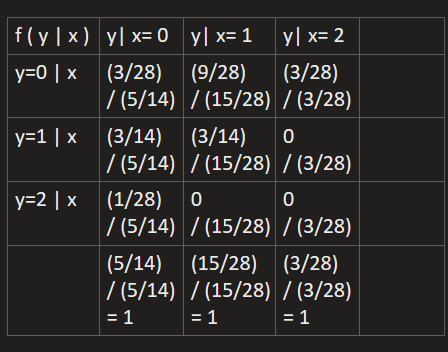

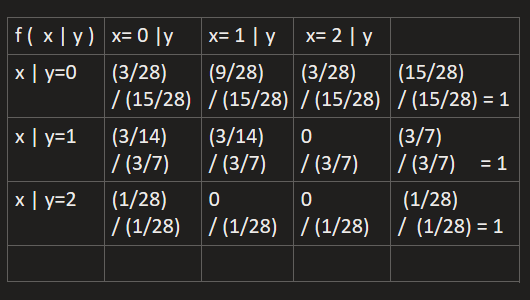

## Example b3.19: 

The joint density for the random variables (X, Y ), 
where X is the unit temperature change and Y is the proportion of spectrum shift 
that a certain atomic particle
produces, is

$
f(x, y) =
\begin{cases}
10xy^2, & 0 < x < y < 1,\\
0, & elsewhere.
\end{cases}
$

- (a) Find the marginal densities g(x), h(y), and the conditional density f(y|x).
- (b) Find the probability that the spectrum shifts more than half of the total observations, given that the temperature is increased by 0.25 unit.

![](media/Ch02/image72.png) <div style="text-align: right">【p02.052】</div>
![](media/Ch02/image73.png) <div style="text-align: right">【p02.053】</div>

![](media/Ch02/image74.png) <div style="text-align: right">【p02.054】</div>
![](media/Ch02/image75.png) <div style="text-align: right">【p02.055】</div>

## Def 2.12: Statistically Independent

![image.png](fg/ch02/def2.12.png)
![](media/Ch02/image76.png) <div style="text-align: right">【p02.056】</div>

## Ex 2.21
![](fg/fg_jointPmf_table2.1_1.PNG)
![](media/Ch02/image77.png) <div style="text-align: right">【p02.057】</div>

## Def 2.13
![image.png](fg/ch02/def2.13.png)
![](media/Ch02/image78.png) <div style="text-align: right">【p02.058】</div>

## Example b3.22: 

Suppose that the shelf life, in years, of a certain perishable food product packaged
in cardboard containers is a random variable whose probability density function is
given by

$
f(x) =
\begin{cases}
e^{−x}, & x>0,\\
0, & elsewhere.
\end{cases}
$

Let $X_1, \ X_2, \ and \ X_3$ represent the shelf lives for three of these containers 
selected independently and find 

$P(X_1 < 2, 1 < X_2 < 3, X_3 > 2) = \ ?$


![](media/Ch02/image79.png) <div style="text-align: right">【p02.059】</div>

![](media/Ch02/image80.png) <div style="text-align: right">【p02.060】</div>

## Def2.14: Mean, Expectated Value (or Expectation)

![image.png](fg/ch02/def2.14.png)
![](media/Ch02/image82.png) <div style="text-align: right">【p02.061】</div>

## Example b4.1: 

A lot containing 7 components is sampled by a quality inspector; 

the lot contains 4 good components and 3 defective components. 

A sample of 3 is taken by the inspector. 

Find the expected value of the number of good components in this sample.

![](media/Ch02/image83.png) <div style="text-align: right">【p02.062】</div>

## Example b4.2: 

A salesperson for a medical device company has 2 appointments on a given day.

At the first appointment, he believes that he has a 70% chance to make the deal,
from which he can earn 1,000 dollars commission if successful. 

On the other hand, he thinks he only has a 40% chance to make the deal at the second appointment,
from which, if successful, he can make 1,500 dollars. 

What is his expected commission based on his own probability belief? 
Assume that the appointment results are `independent` of each other.

![](media/Ch02/image84.png) <div style="text-align: right">【p02.063】</div>

## Example b4.3: 

Let X be the random variable that denotes the life in hours of a certain electronic
device. The probability density function is

$
f(x) =
\begin{cases}

\frac{20,000}{x^3} , & x>100,\\
0, & elsewhere.
\end{cases}
$

Find the expected life of this type of device.

![](media/Ch02/image85.png) <div style="text-align: right">【p02.064】</div>

## Th 2.1
![image.png](fg/ch02/th2.1.png)
![](media/Ch02/image86.png) <div style="text-align: right">【p02.065】</div>

## Example 4.4: 

Suppose that the number of cars X that pass through a car wash between 4:00 P.M. and 5:00 P.M. on any sunny Friday has the following probability distribution:

x |4  |5  |6  |7  |8  |9
---|---|---|---|---|---|---
P(X = x) |1/12 | 1/12 | 1/4 | 1/4 | 1/6 | 1/6

Let g(X) = 2X−1 represent the amount of money, in dollars, paid to the attendant by the manager. 
- Find the attendant’s expected earnings for this particular time period.

![](media/Ch02/image87.png) <div style="text-align: right">【p02.066】</div>

## Example b4.5: 

Let X be a random variable with density function

$
f(x) =
\begin{cases}
x^2/3 , & −1 < x < 2,\\
0, & elsewhere.
\end{cases}
$

Find the expected value of g(X) = 4X + 3.


![](media/Ch02/image88.png) <div style="text-align: right">【p02.067】</div>
![](media/Ch02/image89.png) <div style="text-align: right">【p02.068】</div>

## Def2.15: Mean

![image.png](fg/ch02/def2.15.png)
![](media/Ch02/image90.png) <div style="text-align: right">【p02.069】</div>

![](media/Ch02/image91.png) <div style="text-align: right">【p02.070】</div>
![](media/Ch02/image92.png) <div style="text-align: right">【p02.071】</div>
![](media/Ch02/image93.png) <div style="text-align: right">【p02.072】</div>

Note that if g(X, Y ) = X in Definition 4.2, we have

![](fg/fg_expectation.PNG)

where g(x) is the marginal distribution of X. 

Therefore, in calculating E(X) over a two-dimensional space, 
one may use either the joint probability distribution of X and Y or the marginal distribution of X.

## Figure b4.1: 
Distributions with equal means and unequal dispersions.

![](media/Ch02/image103.png) <div style="text-align: right">【p02.073】</div>

## Def2.16: Standard Deviation (std)

![image.png](fg/ch02/def2.16.png)
![](media/Ch02/image105.png) <div style="text-align: right">【p02.074】</div>

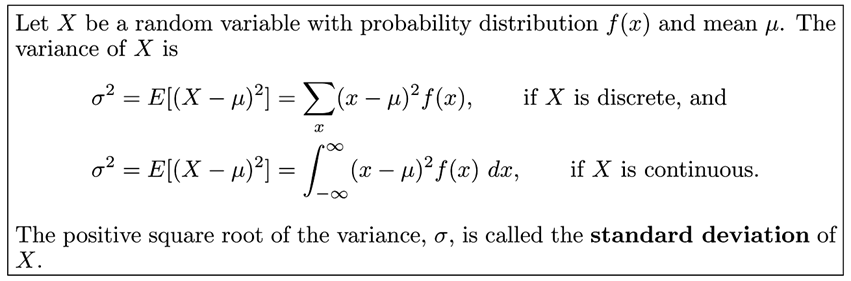

![](media/Ch02/image106.png) <div style="text-align: right">【p02.075】</div>
![](media/Ch02/image107.png) <div style="text-align: right">【p02.076】</div>
![](media/Ch02/image108.png) <div style="text-align: right">【p02.077】</div>

## Th2.2
![image.png](fg/ch02/th2.2.png)
![](media/Ch02/image109.png) <div style="text-align: right">【p02.078】</div>

![](media/Ch02/image110.png) <div style="text-align: right">【p02.079】</div>

![](media/Ch02/image111.png) <div style="text-align: right">【p02.080】</div>
![](media/Ch02/image112.png) <div style="text-align: right">【p02.081】</div>

## Th2.3
![image.png](fg/ch02/th2.3.png)
![](media/Ch02/image115.png) <div style="text-align: right">【p02.082】</div>

![](media/Ch02/image121.png) <div style="text-align: right">【p02.083】</div>
![](media/Ch02/image122.png) <div style="text-align: right">【p02.084】</div>


## Example b4.5: 

Let X be a random variable with density function

$
f(x) =
\begin{cases}
x^2/3 , & −1 < x < 2,\\
0, & elsewhere.
\end{cases}
$

- Find the expected value of g(X) = 4X + 3.

- Find the variance of g(X) = 4X + 3

![](media/Ch02/image126.png) <div style="text-align: right">【p02.085】</div>

## Def2.17: Covariance

![image.png](fg/ch02/def2.17.png)
![](media/Ch02/image127.png) <div style="text-align: right">【p02.086】</div>

## Th2.4
![image.png](fg/ch02/th2.4.png)
![](media/Ch02/image128.png) <div style="text-align: right">【p02.087】</div>

![](media/Ch02/image129.png) <div style="text-align: right">【p02.088】</div>
![](media/Ch02/image130.png) <div style="text-align: right">【p02.089】</div>

![](media/Ch02/image131.png) <div style="text-align: right">【p02.090】</div>
![](media/Ch02/image132.png) <div style="text-align: right">【p02.091】</div>
![](media/Ch02/image133.png) <div style="text-align: right">【p02.092】</div>

## Def 2.18: correlation coefficient

![image.png](fg/ch02/def2.18.png)
![](media/Ch02/image134.png) <div style="text-align: right">【p02.093】</div>

![](media/Ch02/image135.png) <div style="text-align: right">【p02.094】</div>
![](media/Ch02/image136.png) <div style="text-align: right">【p02.095】</div>

## Means and Variances of Linear Combinations of Random Variables

- We now develop some useful properties that will simplify the calculations of means and variances of random variables that appear in later chapters. 

- These properties will permit us to deal with expectations in terms of other parameters that are either known or easily computed. 
 
- All the results that we present here are valid for both discrete and continuous random variables. 
 
- Proofs are given only for the continuous case. We begin with a theorem and two corollaries that should be, intuitively, reasonable to the reader.

## Th 2.5
![image.png](fg/ch02/th2.5.png)
![](media/Ch02/image140.png) <div style="text-align: right">【p02.096】</div>
![](media/Ch02/image141.png) <div style="text-align: right">【p02.097】</div>

![](media/Ch02/image142.png) <div style="text-align: right">【p02.098】</div>

## Th 2.6
![image.png](fg/ch02/th2.6.png)
![](media/Ch02/image143.png) <div style="text-align: right">【p02.099】</div>

![](media/Ch02/image144.png) <div style="text-align: right">【p02.100】</div>
![](media/Ch02/image145.png) <div style="text-align: right">【p02.101】</div>
![](media/Ch02/image146.png) <div style="text-align: right">【p02.102】</div>
![](media/Ch02/image147.png) <div style="text-align: right">【p02.103】</div>

## Th 2.7
![image.png](fg/ch02/th2.7.png)
![](media/Ch02/image148.png) <div style="text-align: right">【p02.104】</div>
![](media/Ch02/image149.png) <div style="text-align: right">【p02.105】</div>
![](media/Ch02/image150.png) <div style="text-align: right">【p02.106】</div>

## Th2.8
![image.png](fg/ch02/th2.8.png)

![](media/Ch02/image154.png) <div style="text-align: right">【p02.107】</div>
![](media/Ch02/image155.png) <div style="text-align: right">【p02.108】</div>
![](media/Ch02/image158.png) <div style="text-align: right">【p02.111】</div>

## Example b4.21: 

It is known that the ratio of gallium to arsenide does not affect the functioning
of gallium-arsenide wafers, which are the main components of microchips. 

Let X denote the ratio of gallium to arsenide and Y denote the functional wafers retrieved
during a 1-hour period. 

X and Y are independent random variables with the joint
density function

$
f(x, y) =
\begin{cases}
\frac{x (1+3y^2)}{4} , & 0 < x < 2, 0 < y < 1,\\
0, &elsewhere.
\end{cases}
$

Show that 

$E(XY) = E(X) E(Y )$

----
砷化鎵（化學式：GaAs）是鎵和砷兩種元素所合成的化合物，

Wafer:![](https://upload.wikimedia.org/wikipedia/commons/f/f7/Akbar_Mashti.JPG)
![](https://upload.wikimedia.org/wikipedia/commons/d/d7/Wafer_2_Zoll_bis_8_Zoll_2.jpg)

TSMC 台積電: 台灣的`護國神山`

![](https://upload.wikimedia.org/wikipedia/zh/thumb/f/fd/TSMC.svg/1024px-TSMC.svg.png)

----

![](media/Ch02/image157.png) <div style="text-align: right">【p02.110】</div>
![](media/Ch02/image158.png) <div style="text-align: right">【p02.111】</div>

![](media/Ch02/image156.png) <div style="text-align: right">【p02.109】</div>

## Th 2.9
![image.png](fg/ch02/th2.9.png)

![](media/Ch02/image161.png) <div style="text-align: right">【p02.112】</div>
![](media/Ch02/image163.png) <div style="text-align: right">【p02.113】</div>
![](media/Ch02/image164.png) <div style="text-align: right">【p02.114】</div>
![](media/Ch02/image165.png) <div style="text-align: right">【p02.115】</div>
![](media/Ch02/image166.png) <div style="text-align: right">【p02.116】</div>
![](media/Ch02/image167.png) <div style="text-align: right">【p02.117】</div>
![](media/Ch02/image168.png) <div style="text-align: right">【p02.118】</div>

![](media/Ch02/image169.png) <div style="text-align: right">【p02.119】</div>
![](media/Ch02/image170.png) <div style="text-align: right">【p02.120】</div>

## Chebyshev’s Theorem

 
The `probability` that any random variable X 

will assume a value within $k$ standard deviations (σ) of the mean (μ) 

is `at least` 
$\left(1 − \frac{1}{k^2}\right)$. 

That is,

$
P \left{ μ − kσ < X < μ+ kσ \right} ≥ \left(1 − \frac{1}{k^2}\right) $.

## Example b4.27: 

A random variable X has a mean μ = 8, a variance $σ^2$ = 9, 
and an unknown probability distribution. 

Find
- (a) P(−4 < X < 20),
- (b) P(|X − 8| ≥ 6).

Solution : 

(a) 
P(−4 < X < 20) 
= P[8 − (4)(3) < X < 8 + (4)(3)] 
≥ 15/16 .

(b) 
P(|X − 8| ≥ 6) 
= 1 − P(|X − 8| < 6) 
= 1 − P(−6 < X − 8 < 6)
= 1− P[8 − (2)(3) < X < 8 + (2)(3)] ≤ 1/4 .